In [1]:
import numpy as np # recall that "np" etc. -- are abbreviated names we gave to these packages for notational convenience
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

import pandas as pd

df = pd.read_csv('6722-credit-card-default-data.csv')

#When analyzing for "Without Gender" - remove the hashtag 
#df.drop("SEX")

In [2]:
#feature engineering
df['COUNT_PAY_MINUS_2'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == -2).sum(axis=1)
df['COUNT_PAY_MINUS_1'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == -1).sum(axis=1)
df['COUNT_PAY_0'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 0).sum(axis=1)
df['COUNT_PAY_1'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 1).sum(axis=1)
df['COUNT_PAY_2'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 2).sum(axis=1)
df['COUNT_PAY_3'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 3).sum(axis=1)
df['COUNT_PAY_4'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 4).sum(axis=1)
df['COUNT_PAY_5'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 5).sum(axis=1)
df['COUNT_PAY_6'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 6).sum(axis=1)
df['COUNT_PAY_7'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 7).sum(axis=1)
df['COUNT_PAY_8'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 8).sum(axis=1)

#sum of bill amount and payments over 6 months
df['TTL_BILL'] = df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']
df['TTL_PYMT'] = df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']
df['TTL_PAY'] = df['PAY_1']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']


df['LOG_PAY_AMT1'] = np.log(df['PAY_AMT1'].replace(0,0.0001))
df['LOG_PAY_AMT2'] = np.log(df['PAY_AMT2'].replace(0,0.0001))
df['LOG_PAY_AMT3'] = np.log(df['PAY_AMT3'].replace(0,0.0001))
df['LOG_PAY_AMT4'] = np.log(df['PAY_AMT4'].replace(0,0.0001))
df['LOG_PAY_AMT5'] = np.log(df['PAY_AMT5'].replace(0,0.0001))
df['LOG_PAY_AMT6'] = np.log(df['PAY_AMT6'].replace(0,0.0001))

df['LOG_LIMIT_BAL'] = np.log(df['LIMIT_BAL'].replace(0,0.0001))
df['LOG_TTL_PYMT'] = np.log(df['TTL_PYMT'].replace(0,0.0001))
df['LOG_TTL_BILL'] = np.log(df['TTL_BILL'].apply(lambda x: 0.0001 if x < 1 else x))

df['PAY_AMT_AVG'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)
df['PAY_TREND'] = (df['PAY_AMT5']-df['PAY_AMT6'])+(df['PAY_AMT4']-df['PAY_AMT5'])+(df['PAY_AMT3']-df['PAY_AMT4'])+(df['PAY_AMT2']-df['PAY_AMT3'])+(df['PAY_AMT1']-df['PAY_AMT2'])

df['NET_PAY'] = df['PAY_1']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']
df['PAY_1_SQR'] = df['PAY_1']**2
df['PAY_2_SQR'] = df['PAY_2']**2
df['PAY_3_SQR'] = df['PAY_3']**2
df['PAY_4_SQR'] = df['PAY_4']**2
df['PAY_5_SQR'] = df['PAY_5']**2
df['PAY_6_SQR'] = df['PAY_6']**2


#credit utilization
df['CREDIT_UTILIZATION1'] = df['BILL_AMT1'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL']
df['CREDIT_UTILIZATION2'] = df['BILL_AMT2'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION3'] = df['BILL_AMT3'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION4'] = df['BILL_AMT4'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION5'] = df['BILL_AMT5'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION6'] = df['BILL_AMT6'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL'] 

#lagged percentage of bill paid each month
df['BILL_PCT_PAID2'] = df['PAY_AMT1'] / df['BILL_AMT2'].replace(0,0.0001)
df['BILL_PCT_PAID3'] = df['PAY_AMT2'] / df['BILL_AMT3'].replace(0,0.0001)
df['BILL_PCT_PAID4'] = df['PAY_AMT3'] / df['BILL_AMT4'].replace(0,0.0001)
df['BILL_PCT_PAID5'] = df['PAY_AMT4'] / df['BILL_AMT5'].replace(0,0.0001)
df['BILL_PCT_PAID6'] = df['PAY_AMT5'] / df['BILL_AMT6'].replace(0,0.0001)


df['NEG_BILL_AMT1'] = df['BILL_AMT1'].apply(lambda x: 1 if x < 0 else 0)
df['NEG_BILL_AMT2'] = df['BILL_AMT2'].apply(lambda x: 1 if x < 0 else 0)
df['NEG_BILL_AMT3'] = df['BILL_AMT3'].apply(lambda x: 1 if x < 0 else 0)
df['NEG_BILL_AMT4'] = df['BILL_AMT4'].apply(lambda x: 1 if x < 0 else 0)
df['NEG_BILL_AMT5'] = df['BILL_AMT5'].apply(lambda x: 1 if x < 0 else 0)
df['NEG_BILL_AMT6'] = df['BILL_AMT6'].apply(lambda x: 1 if x < 0 else 0)

#payment variance
payment_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# Calculate the Payment Variance for each row
df['PMT_VAR'] = df[payment_columns].apply(lambda row: np.var(row), axis=1).replace(0,0.0001)

payment_columns = ['BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1']
# Calculate the Payment Variance for each row
df['PMT_VAR2'] = df[payment_columns].apply(lambda row: np.var(row), axis=1).replace(0,0.0001)

In [3]:
# "Cleaning" the data -- part 1: converting data types that should be categorican into "category"

df['SEX'] = df['SEX'].astype('category') #Comment when running for without gender model
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')
df['PAY_1'] = df['PAY_1'].astype('category')
df['PAY_2'] = df['PAY_2'].astype('category')
df['PAY_3'] = df['PAY_3'].astype('category')
df['PAY_4'] = df['PAY_4'].astype('category')
df['PAY_5'] = df['PAY_5'].astype('category')
df['PAY_6'] = df['PAY_6'].astype('category')


df.info() # let check the result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   24000 non-null  int64   
 1   LIMIT_BAL            24000 non-null  float64 
 2   SEX                  24000 non-null  category
 3   EDUCATION            24000 non-null  category
 4   MARRIAGE             24000 non-null  category
 5   AGE                  24000 non-null  int64   
 6   PAY_1                24000 non-null  category
 7   PAY_2                24000 non-null  category
 8   PAY_3                24000 non-null  category
 9   PAY_4                24000 non-null  category
 10  PAY_5                24000 non-null  category
 11  PAY_6                24000 non-null  category
 12  BILL_AMT1            24000 non-null  float64 
 13  BILL_AMT2            24000 non-null  float64 
 14  BILL_AMT3            24000 non-null  float64 
 15  BILL_AMT4          

In [4]:
def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    df[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

# lets apply this functino to our data with mincount=10
CombineRareCategories(df, 10)

df[0:10] #lets check the result

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_PCT_PAID5,BILL_PCT_PAID6,NEG_BILL_AMT1,NEG_BILL_AMT2,NEG_BILL_AMT3,NEG_BILL_AMT4,NEG_BILL_AMT5,NEG_BILL_AMT6,PMT_VAR,PMT_VAR2
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.000000,0.000000,0,0,0,0,0,0,6.593347e+04,0.0001
1,2,90000.0,2,2,2,34,0,0,0,0,...,0.066899,0.064313,0,0,0,0,0,0,2.053601e+06,0.0001
2,3,50000.0,2,2,1,37,0,0,0,0,...,0.037985,0.036180,0,0,0,0,0,0,1.904497e+05,0.0001
3,4,50000.0,1,2,1,57,-1,0,-1,0,...,0.470072,0.036015,0,0,0,0,0,0,1.583835e+08,0.0001
4,5,50000.0,1,1,2,37,0,0,0,0,...,0.050971,0.049940,0,0,0,0,0,0,4.247572e+05,0.0001
5,6,100000.0,2,2,2,23,0,-1,-1,0,...,-3.654088,2.975309,0,0,0,0,1,0,3.735469e+05,0.0001
6,7,140000.0,2,3,1,28,0,0,2,0,...,0.084796,0.268889,0,0,0,0,0,0,1.108391e+06,0.0001
7,8,20000.0,1,3,2,35,-2,-2,-2,-2,...,1.000000,0.080650,0,0,0,0,0,0,2.286158e+07,0.0001
8,9,200000.0,2,3,2,34,0,0,2,0,...,0.164114,1.001876,0,0,0,0,0,0,2.067692e+06,0.0001
9,10,260000.0,2,1,2,51,-1,-1,-1,-1,...,1.000628,0.000000,0,0,0,0,0,0,7.113443e+07,0.0001


In [5]:
df = pd.get_dummies(df, columns = df.select_dtypes(exclude=['int64','float64']).columns, drop_first = True)

pd.options.display.max_columns = None 
pd.options.display.max_columns = None 


df.head()  

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,COUNT_PAY_MINUS_2,COUNT_PAY_MINUS_1,COUNT_PAY_0,COUNT_PAY_1,COUNT_PAY_2,COUNT_PAY_3,COUNT_PAY_4,COUNT_PAY_5,COUNT_PAY_6,COUNT_PAY_7,COUNT_PAY_8,TTL_BILL,TTL_PYMT,TTL_PAY,LOG_PAY_AMT1,LOG_PAY_AMT2,LOG_PAY_AMT3,LOG_PAY_AMT4,LOG_PAY_AMT5,LOG_PAY_AMT6,LOG_LIMIT_BAL,LOG_TTL_PYMT,LOG_TTL_BILL,PAY_AMT_AVG,PAY_TREND,NET_PAY,PAY_1_SQR,PAY_2_SQR,PAY_3_SQR,PAY_4_SQR,PAY_5_SQR,PAY_6_SQR,CREDIT_UTILIZATION1,CREDIT_UTILIZATION2,CREDIT_UTILIZATION3,CREDIT_UTILIZATION4,CREDIT_UTILIZATION5,CREDIT_UTILIZATION6,BILL_PCT_PAID2,BILL_PCT_PAID3,BILL_PCT_PAID4,BILL_PCT_PAID5,BILL_PCT_PAID6,NEG_BILL_AMT1,NEG_BILL_AMT2,NEG_BILL_AMT3,NEG_BILL_AMT4,NEG_BILL_AMT5,NEG_BILL_AMT6,PMT_VAR,PMT_VAR2,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,2,2,0,0,2,0,0,0,0,0,0,7704.0,689.0,-2,-9.210340,6.535241,-9.210340,-9.210340,-9.210340,-9.210340,9.903488,6.535241,8.949495,114.833333,0.0,-2,4,4,1,1,4,4,0.195650,0.155100,0.034450,5.000000e-09,5.000000e-09,5.000000e-09,0.000000,1.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,6.593347e+04,0.0001,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,6,0,0,0,0,0,0,0,0,101653.0,11018.0,0,7.325149,7.313220,6.907755,6.907755,6.907755,8.517193,11.407565,9.307286,11.529320,1836.333333,-3482.0,0,0,0,0,0,0,0,0.324878,0.155856,0.150656,1.592333e-01,1.660889e-01,1.727667e-01,0.108220,0.110628,0.069779,0.066899,0.064313,0,0,0,0,0,0,2.053601e+06,0.0001,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0,6,0,0,0,0,0,0,0,0,231334.0,8388.0,0,7.600902,7.610358,7.090077,7.003065,6.974479,6.907755,10.819778,9.034557,12.351618,1398.000000,1000.0,0,0,0,0,0,0,0,0.939800,0.964660,0.985820,5.662800e-01,5.791800e-01,5.909400e-01,0.041465,0.040961,0.042382,0.037985,0.036180,0,0,0,0,0,0,1.904497e+05,0.0001,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,2,4,0,0,0,0,0,0,0,0,109339.0,59049.0,-2,7.600902,10.510014,9.210340,9.104980,6.535241,6.520621,10.819778,10.986123,11.602208,9841.500000,1321.0,-2,1,0,1,0,0,0,0.172340,0.113400,0.716700,4.188000e-01,3.829200e-01,3.826200e-01,0.352734,1.023608,0.477555,0.470072,0.036015,0,0,0,0,0,0,1.583835e+08,0.0001,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,37,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,0,0,6,0,0,0,0,0,0,0,0,238114.0,7772.0,0,7.824046,7.503841,6.487684,6.907755,6.907755,6.684612,10.819778,8.958283,12.380505,1295.333333,1700.0,0,0,0,0,0,0,0,1.288000,1.141380,1.152160,3.878800e-01,3.923800e-01,4.004800e-01,0.043807,0.031506,0.033876,0.050971,0.049940,0,0,0,0,0,0,4.247572e+05,0.0001,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [6]:
y = df['DEFAULT']
X = df.drop(columns = ['DEFAULT', 'ID'])

class_threshold = 0.230769231

np.random.seed(77300)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19200, 133)
(4800, 133)
(19200,)
(4800,)


In [7]:
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

#simulate profit calculation normalized to 1000 applications
def custom_profit_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (((tn/(tn+fn+tp+fp))*1000)*1500) + (((fn/(tn+fn+tp+fp))*1000)*-5000)

In [8]:
# Define the gradient boosting machine model and call it classifier_GBM
classifier_GBM = GradientBoostingClassifier(learning_rate=0.15, n_estimators=150, random_state=77300)

# Train the model classifier_GBM on the training data
classifier_GBM.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.15, n_estimators=150,
                           random_state=77300)

Metrics of the Gradient Boosting Machine model: 

Confusion matrix: 
[[3005  734]
 [ 380  681]]
                                   Accuracy: 0.7679166666666667
                   SENSITIVITY (aka RECALL): 0.6418473138548539
                 SPECIFICITY (aka FALL-OUT): 0.8036908264241776
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.4812720848056537
                 NEGATIVE PREDICTIVE VALUE): 0.8877400295420975


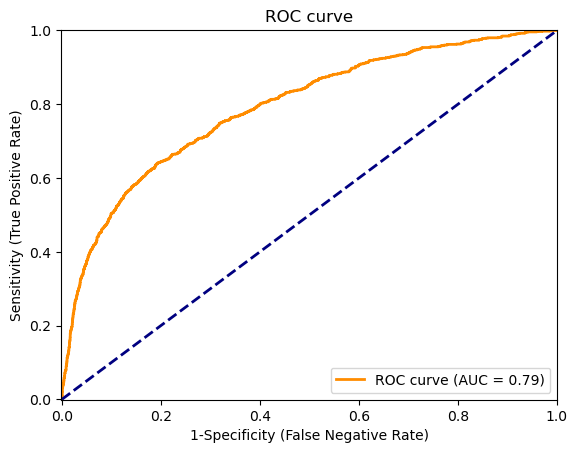

 AUC: 0.7915851940432748
                           Projected Profit: $543,229.17


In [9]:
# Use the trained model to predict testing data
y_pred_prob = classifier_GBM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Gradient Boosting Machine model: \n')

cm = confusion_matrix(y_test, y_pred)
#cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))
print("                           Projected Profit: "   +'${:,.2f}'.format(custom_profit_score(y_test,y_pred)))

In [10]:
# If we have the prediction data (e.g., about the new clients) the load and clean them first to obtain the X_pred matrix of exactly the same structure as X_train
# in our case there is no such data, so we will predict the testign data and export the resultant predictions
X_pred = X_test

# Since the random forest model with optimized hyper-parameters obtained the higest AUC, lets take that; recall it is called grid_search_RF
y_pred_prob = classifier_GBM.predict_proba(X_pred)[:,1]

# Lets add the ID column to know "who is who"
Prediction = pd.DataFrame(data={"SEX_2": X_test['SEX_2'],"Predicted Probability":y_pred_prob, "Prediction":y_pred, "Actual Results":y_test})

# Export the predictions into a CSV file
Prediction.to_csv("Prediction with gender.csv",sep = ',')

In [11]:
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))

                                   Accuracy: 0.7679166666666667


In [12]:
import scipy.stats as stats

# Separate data for males and females
male_data = Prediction[Prediction['SEX_2'] == 0]
female_data = Prediction[Prediction['SEX_2'] == 1]

# Extract predicted probabilities for each group
male_probs = male_data['Predicted Probability']
female_probs = female_data['Predicted Probability']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(male_probs, female_probs)

# Set significance level
alpha = 0.05

# Check if the p-value is smaller than the significance level
if p_value < alpha:
    print("The model treats males and females differently (reject H0)")
else:
    print("There is no significant difference in how the model treats males and females (fail to reject H0)")

# You can also print the p-value to see its numerical value
print("p-value:", p_value)
#This code will conduct a t-test and determine whether the model's predictions for males and females are significantly different. Adjust the alpha value to change the significance level if needed.


The model treats males and females differently (reject H0)
p-value: 1.6406066121727707e-11
